Exploratory Data Analysis

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings 
import sqlite3 
from scipy.stats import ttest_ind
import scipy.stats as stats 
warnings.filterwarnings('ignore')

Loading the dataset

In [2]:
conn = sqlite3.connect('inventory.db') 



In [3]:
df = pd.read_sql_query("select * from vendor_sales_summary1",conn)
df.head()

,VendorNumber,VendorName,Brand,PurchasePrice,Actual_sellingPrice,Volume,Description,total_purchase_quantity,total_purchases_amount_in_dollars,TOTAL_SALES_QUANTITY,TOTAL_SALES_PRICE,TOTAL_SALES_DOLLARS,TOTALSALES_EXCISE_TAX,freight_Cost,GrossProfit,Stockturnover,ProfitMargin,SalesToPurchaseRatio
0,7245,PROXIMO SPIRITS INC.,3065,0.71,0.99,50.0,Three Olives Grape Vodka,1,0.71,86,33.66,85.14,4.46,38994.78,84.43,86.000000,99.166079,119.915493
1,3960,DIAGEO NORTH AMERICA INC,6127,1.47,1.99,200.0,The Club Strawbry Margarita,1,1.47,72,77.61,143.28,15.12,257032.07,141.81,72.000000,98.974037,97.469388
2,3924,HEAVEN HILL DISTILLERIES,9123,0.74,0.99,50.0,Deep Eddy Vodka,2,1.48,2,0.99,1.98,0.10,14069.87,0.50,1.000000,25.252525,1.337838
3,8004,SAZERAC CO INC,5683,0.39,0.49,50.0,Dr McGillicuddy's Apple Pie,6,2.34,134,1.47,65.66,7.04,50293.62,63.32,22.333333,96.436186,28.059829
4,9815,WINE GROUP INC,8527,1.32,4.99,750.0,Concannon Glen Ellen Wh Zin,2,2.64,5,10.96,15.95,0.55,27100.41,13.31,2.500000,83.448276,6.041667


Exploratory Data Analysis

->previously , we examined the various tables in the database to identify key variables , understand their      r    relationship, and determine which one should we include in final analysys . 

-> in this phase of eda we will analyze the resultant table to gain insight into the distribution of each column,
this will help us understand the data pattern , identifies the anamolies , and esure data quality before further analysys.


In [4]:
# tep1-> summary statistics 
df.describe()

,VendorNumber,Brand,PurchasePrice,Actual_sellingPrice,Volume,total_purchase_quantity,total_purchases_amount_in_dollars,TOTAL_SALES_QUANTITY,TOTAL_SALES_PRICE,TOTAL_SALES_DOLLARS,TOTALSALES_EXCISE_TAX,freight_Cost,GrossProfit,Stockturnover,ProfitMargin,SalesToPurchaseRatio
count,10692.000000,10692.000000,10692.000000,10692.000000,10692.000000,10692.000000,1.069200e+04,10692.000000,10692.000000,1.069200e+04,10692.000000,10692.000000,1.069200e+04,10692.000000,10692.000000,10692.000000
mean,10650.649458,18039.228769,24.385303,35.643671,847.360550,3140.886831,3.010669e+04,3077.482136,18793.783627,4.223907e+04,1774.226259,61433.763214,1.213238e+04,1.706793,-15.620770,2.504390
std,18753.519148,12662.187074,109.269375,148.246016,664.309212,11095.086769,1.230678e+05,10952.851391,44952.773386,1.676553e+05,10975.582240,60938.458032,4.622434e+04,6.020460,443.555329,8.459067
min,2.000000,58.000000,0.360000,0.490000,50.000000,1.000000,7.100000e-01,0.000000,0.000000,0.000000e+00,0.000000,0.090000,-5.200278e+04,0.000000,-23730.638953,0.000000
25%,3951.000000,5793.500000,6.840000,10.990000,750.000000,36.000000,4.534575e+02,33.000000,289.710000,7.292200e+02,4.800000,14069.870000,5.292000e+01,0.807229,13.324515,1.153729
50%,7153.000000,18761.500000,10.455000,15.990000,750.000000,262.000000,3.655465e+03,261.000000,2857.800000,5.298045e+03,46.570000,50293.620000,1.399640e+03,0.981529,30.405457,1.436894
75%,9552.000000,25514.250000,19.482500,28.990000,750.000000,1975.750000,2.073825e+04,1929.250000,16059.562500,2.839692e+04,418.650000,79528.990000,8.660200e+03,1.039342,39.956135,1.665449
max,201359.000000,90631.000000,5681.810000,7499.990000,20000.000000,337660.000000,3.811252e+06,334939.000000,672819.310000,5.101920e+06,368242.800000,257032.070000,1.290668e+06,274.500000,99.716657,352.928571


In [5]:
df.describe().T 
# t transpose the matrics 

,count,mean,std,min,25%,50%,75%,max
VendorNumber,10692.0,10650.649458,18753.519148,2.000000,3951.000000,7153.000000,9552.000000,2.013590e+05
Brand,10692.0,18039.228769,12662.187074,58.000000,5793.500000,18761.500000,25514.250000,9.063100e+04
PurchasePrice,10692.0,24.385303,109.269375,0.360000,6.840000,10.455000,19.482500,5.681810e+03
Actual_sellingPrice,10692.0,35.643671,148.246016,0.490000,10.990000,15.990000,28.990000,7.499990e+03
Volume,10692.0,847.360550,664.309212,50.000000,750.000000,750.000000,750.000000,2.000000e+04
total_purchase_quantity,10692.0,3140.886831,11095.086769,1.000000,36.000000,262.000000,1975.750000,3.376600e+05
total_purchases_amount_in_dollars,10692.0,30106.693372,123067.799627,0.710000,453.457500,3655.465000,20738.245000,3.811252e+06
TOTAL_SALES_QUANTITY,10692.0,3077.482136,10952.851391,0.000000,33.000000,261.000000,1929.250000,3.349390e+05
TOTAL_SALES_PRICE,10692.0,18793.783627,44952.773386,0.000000,289.710000,2857.800000,16059.562500,6.728193e+05
TOTAL_SALES_DOLLARS,10692.0,42239.074419,167655.265984,0.000000,729.220000,5298.045000,28396.915000,5.101920e+06


In [6]:
'''by looking the above table we find the following analysys :
-> that grossprfit is negative somewhere that means that seller has in loss in some brands .
-> there are some point the value is infinite nan and missing .
-> some columns have minimum value zero that means the product is purchaseed but not sold and is 
 still in the stock .'''

'by looking the above table we find the following analysys :\n-> that grossprfit is negative somewhere that means that seller has in loss in some brands .\n-> there are some point the value is infinite nan and missing .\n-> some columns have minimum value zero that means the product is purchaseed but not sold and is \n still in the stock .'

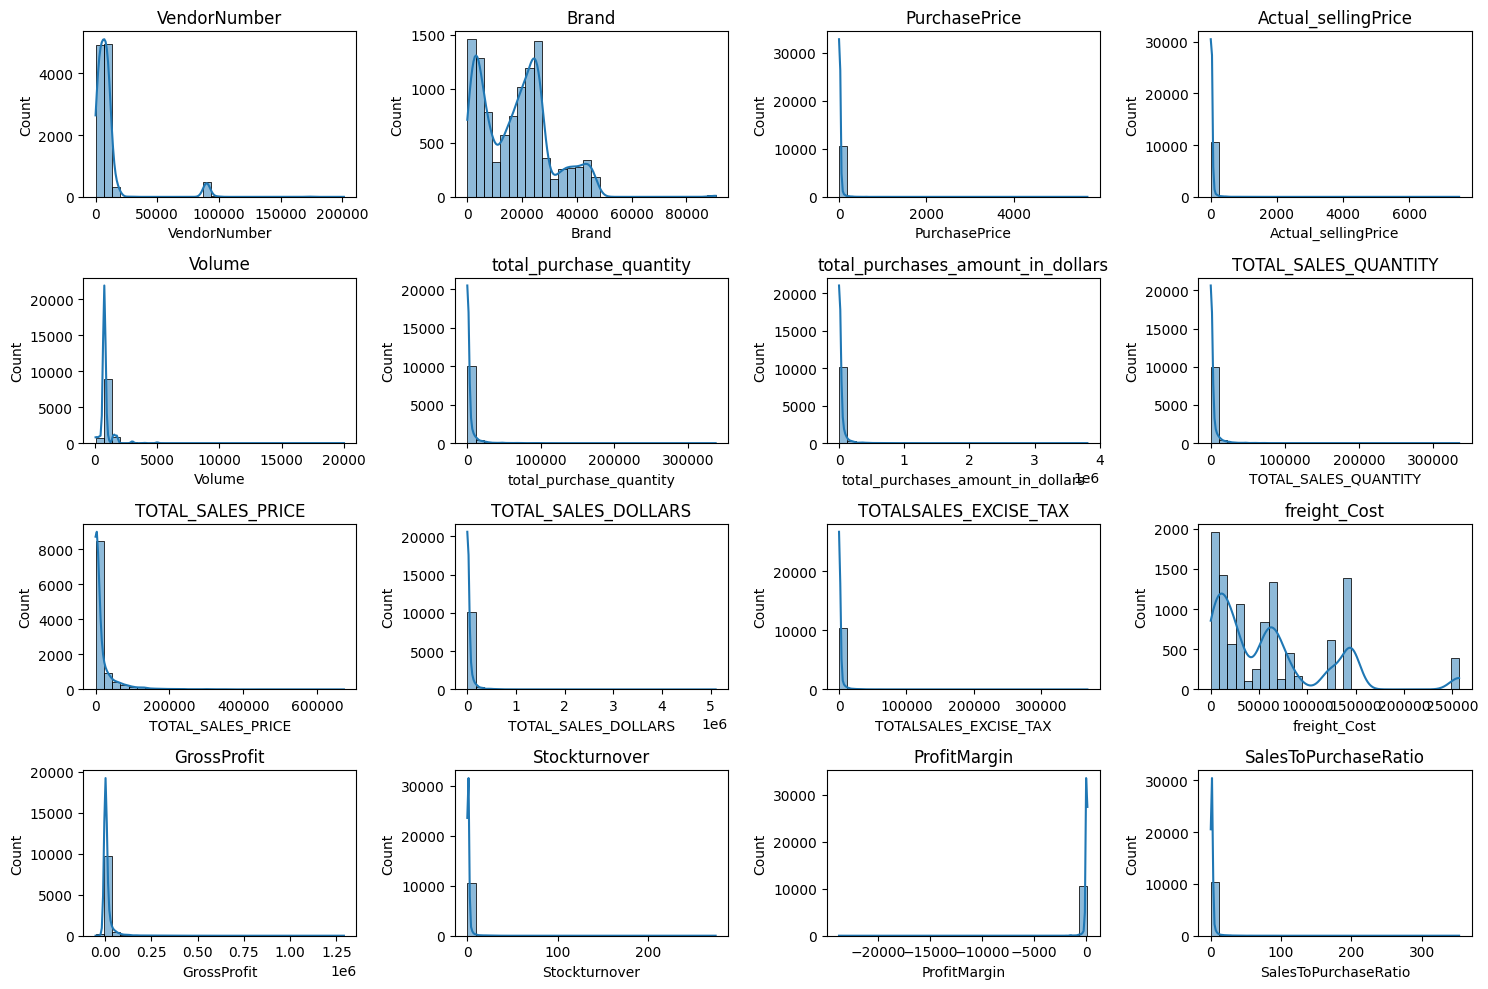

In [7]:
numerical_cols = df.select_dtypes(include=np.number).columns

plt.figure(figsize=(15, 10))

for i, col in enumerate(numerical_cols):
    plt.subplot(4, 4, i+1)  # Adjust grid size if necessary
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(col)

plt.tight_layout()
plt.show()

In [8]:
'''viewing this plot we find that there are many :
-> outliers in purchase price which shows that there are products that have high cost and they not 
sold .
-> in profitmargin we found that the value is in negative .
->purchaseprice and actual_selling price , volume , total_purchase_quantity , total_purchase_amount_in_dollars
 total_sales_quantity are corelated that's why there range is varying so much 
'''

"viewing this plot we find that there are many :\n-> outliers in purchase price which shows that there are products that have high cost and they not \nsold .\n-> in profitmargin we found that the value is in negative .\n->purchaseprice and actual_selling price , volume , total_purchase_quantity , total_purchase_amount_in_dollars\n total_sales_quantity are corelated that's why there range is varying so much \n"

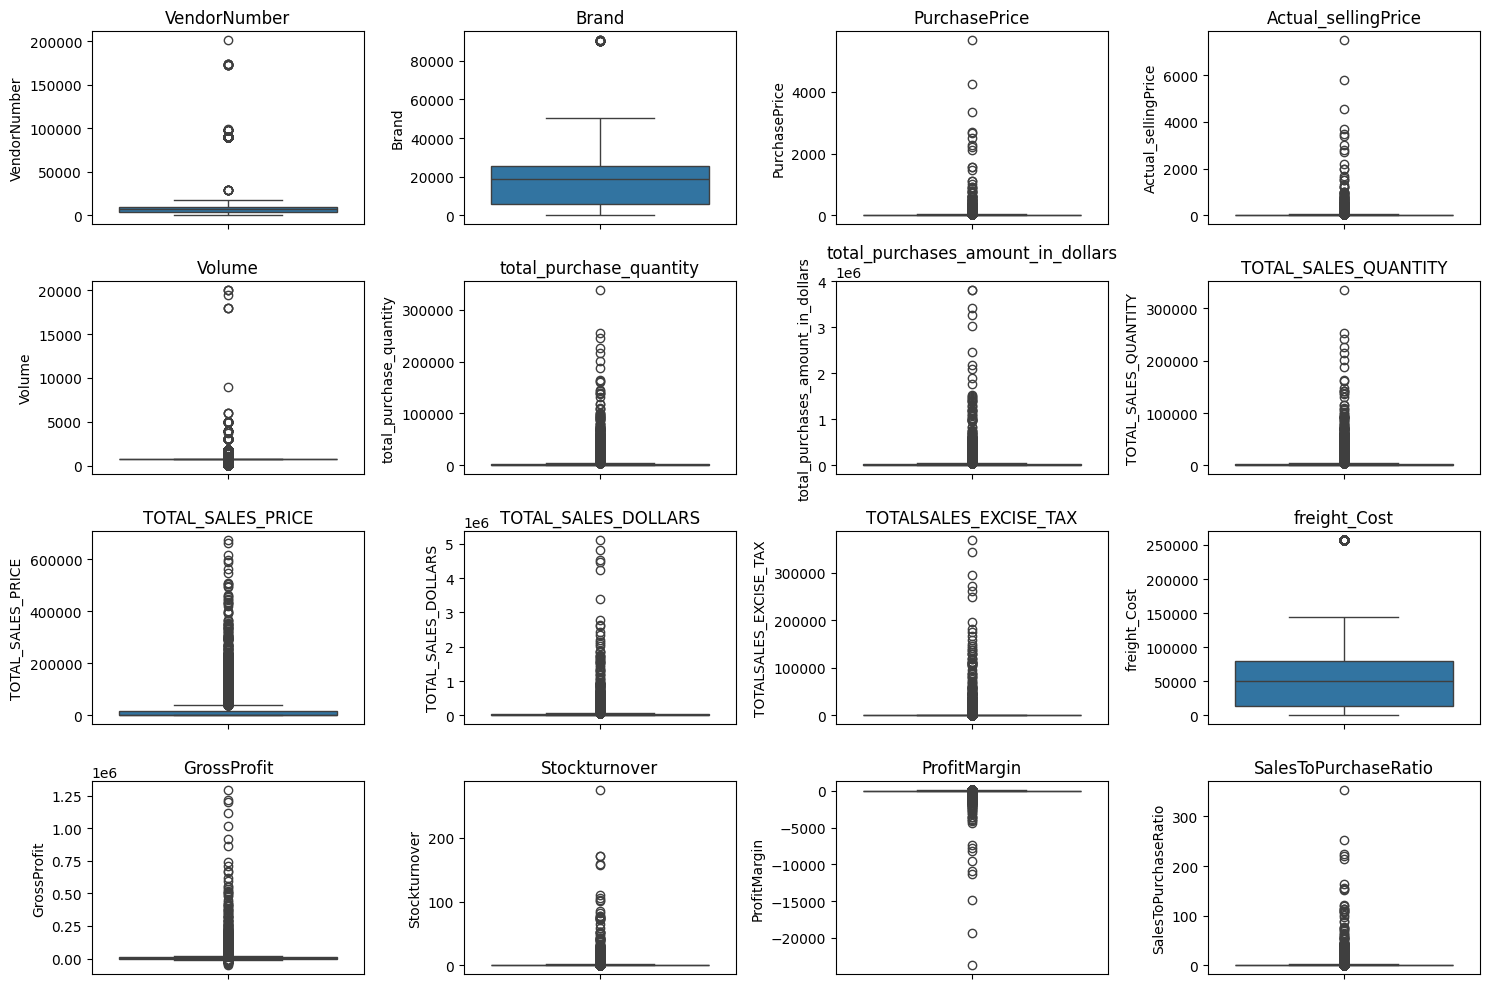

In [9]:
# boxplot 
plt.figure(figsize=(15, 10))

for i, col in enumerate(numerical_cols):
    plt.subplot(4, 4, i+1)  # Adjust grid size if necessary
    sns.boxplot(y=df[col])
    plt.title(col)

plt.tight_layout()
plt.show()

# boxplot is very good for outliers detection

In [10]:
# now we have to performe eda on this finally created table 



Summary Statistics Inside ;
Negative and zero values :
-> in Gross profit the lowest value is - 52,002.78 . indicating losses . Some product and transaction may be selling at a loss due to high cost or selling at the discount lower than the purchase price .

-> Profit Margin: has the minimum of infinite , which suggest that cases where revenue is zero or even lower than cost .
-> Total Stock sales 

In [11]:
df.columns

Index(['VendorNumber', 'VendorName', 'Brand', 'PurchasePrice',
       'Actual_sellingPrice', 'Volume', 'Description',
       'total_purchase_quantity', 'total_purchases_amount_in_dollars',
       'TOTAL_SALES_QUANTITY', 'TOTAL_SALES_PRICE', 'TOTAL_SALES_DOLLARS',
       'TOTALSALES_EXCISE_TAX', 'freight_Cost', 'GrossProfit', 'Stockturnover',
       'ProfitMargin', 'SalesToPurchaseRatio'],
      dtype='object')

In [12]:
# on the basis of above conclusion we need columns where stockturnover , profitmargin , gross profit 
#  and total sales quantity zero se jayda ho , unhi par analysis karna hai 


# writing a query to get the new records 

df = pd.read_sql_query(""" select * from vendor_sales_summary1 
                       where Grossprofit > 0 and
                       ProfitMargin > 0 and
                       TOTAL_SALES_QUANTITY > 0
                        """ ,conn)

In [13]:
df

,VendorNumber,VendorName,Brand,PurchasePrice,Actual_sellingPrice,Volume,Description,total_purchase_quantity,total_purchases_amount_in_dollars,TOTAL_SALES_QUANTITY,TOTAL_SALES_PRICE,TOTAL_SALES_DOLLARS,TOTALSALES_EXCISE_TAX,freight_Cost,GrossProfit,Stockturnover,ProfitMargin,SalesToPurchaseRatio
0,7245,PROXIMO SPIRITS INC.,3065,0.71,0.99,50.0,Three Olives Grape Vodka,1,0.71,86,33.66,85.14,4.46,38994.78,84.43,86.000000,99.166079,119.915493
1,3960,DIAGEO NORTH AMERICA INC,6127,1.47,1.99,200.0,The Club Strawbry Margarita,1,1.47,72,77.61,143.28,15.12,257032.07,141.81,72.000000,98.974037,97.469388
2,3924,HEAVEN HILL DISTILLERIES,9123,0.74,0.99,50.0,Deep Eddy Vodka,2,1.48,2,0.99,1.98,0.10,14069.87,0.50,1.000000,25.252525,1.337838
3,8004,SAZERAC CO INC,5683,0.39,0.49,50.0,Dr McGillicuddy's Apple Pie,6,2.34,134,1.47,65.66,7.04,50293.62,63.32,22.333333,96.436186,28.059829
4,9815,WINE GROUP INC,8527,1.32,4.99,750.0,Concannon Glen Ellen Wh Zin,2,2.64,5,10.96,15.95,0.55,27100.41,13.31,2.500000,83.448276,6.041667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8559,3960,DIAGEO NORTH AMERICA INC,3545,21.89,29.99,1750.0,Ketel One Vodka,138109,3023206.01,135838,545778.28,4223107.62,249587.83,257032.07,1199901.61,0.983556,28.412764,1.396897
8560,3960,DIAGEO NORTH AMERICA INC,4261,16.17,22.99,1750.0,Capt Morgan Spiced Rum,201682,3261197.94,200412,420050.01,4475972.88,368242.80,257032.07,1214774.94,0.993703,27.139908,1.372493
8561,17035,PERNOD RICARD USA,8068,18.24,24.99,1750.0,Absolut 80 Proof,187407,3418303.68,187140,461140.15,4538120.60,343854.07,123780.22,1119816.92,0.998575,24.675786,1.327594
8562,4425,MARTIGNETTI COMPANIES,3405,23.19,28.99,1750.0,Tito's Handmade Vodka,164038,3804041.22,160247,561512.37,4819073.49,294438.66,144929.24,1015032.27,0.976890,21.062810,1.266830


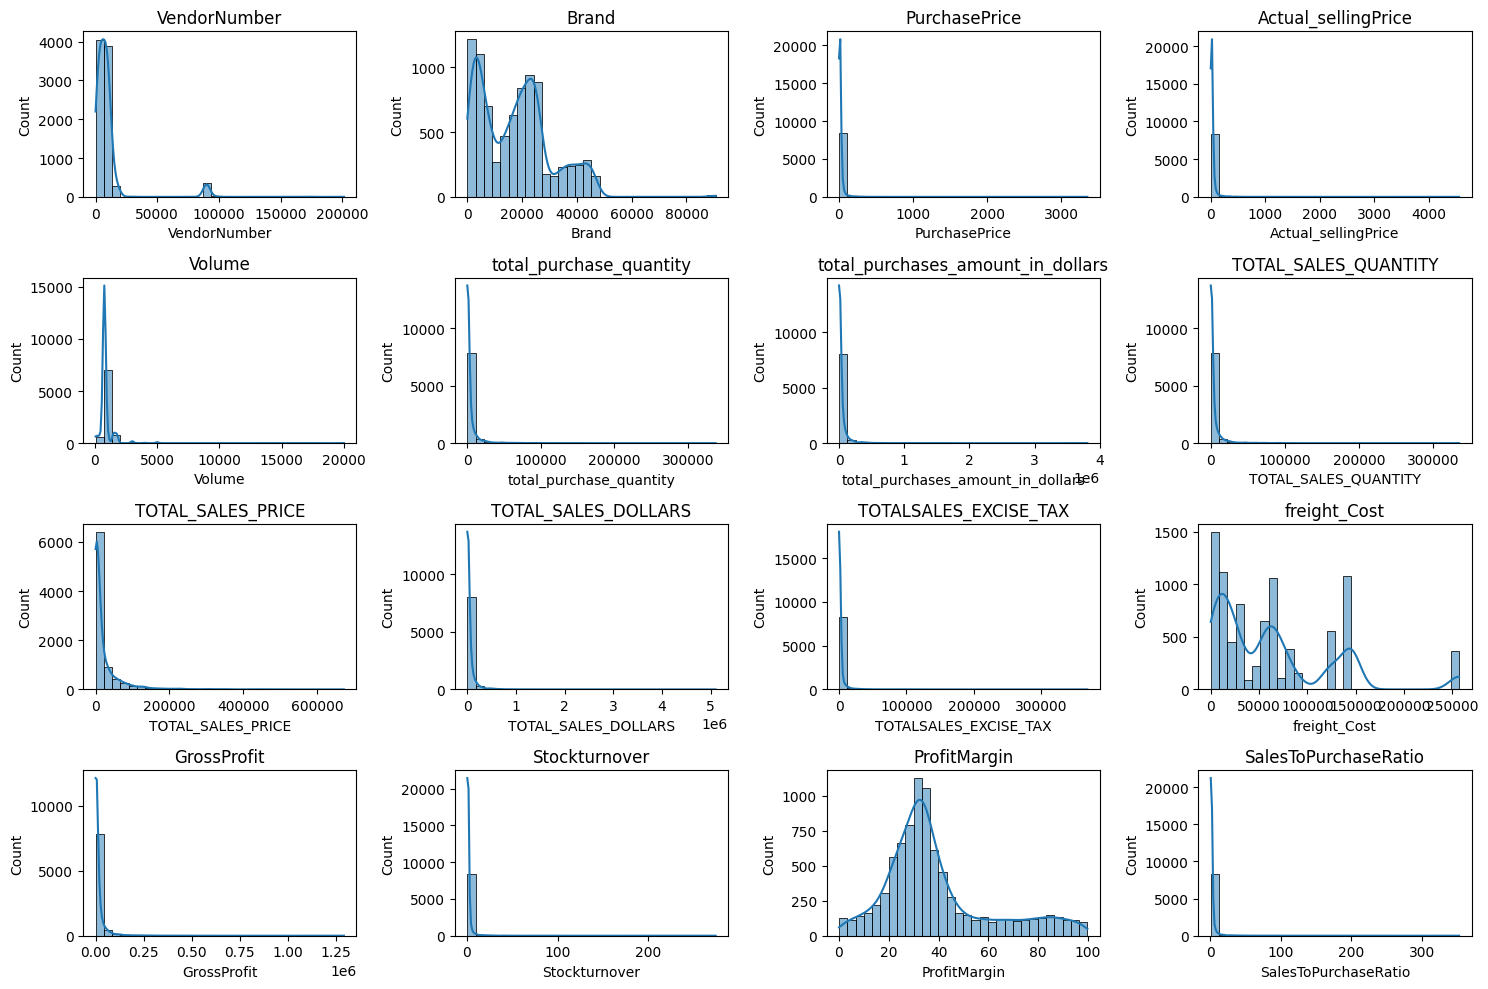

In [14]:
# again plotting the plot
numerical_cols = df.select_dtypes(include=np.number).columns

plt.figure(figsize=(15, 10))

for i, col in enumerate(numerical_cols):
    plt.subplot(4, 4, i+1)  # Adjust grid size if necessary
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(col)

plt.tight_layout()
plt.show()

In [15]:
df.columns

Index(['VendorNumber', 'VendorName', 'Brand', 'PurchasePrice',
       'Actual_sellingPrice', 'Volume', 'Description',
       'total_purchase_quantity', 'total_purchases_amount_in_dollars',
       'TOTAL_SALES_QUANTITY', 'TOTAL_SALES_PRICE', 'TOTAL_SALES_DOLLARS',
       'TOTALSALES_EXCISE_TAX', 'freight_Cost', 'GrossProfit', 'Stockturnover',
       'ProfitMargin', 'SalesToPurchaseRatio'],
      dtype='object')

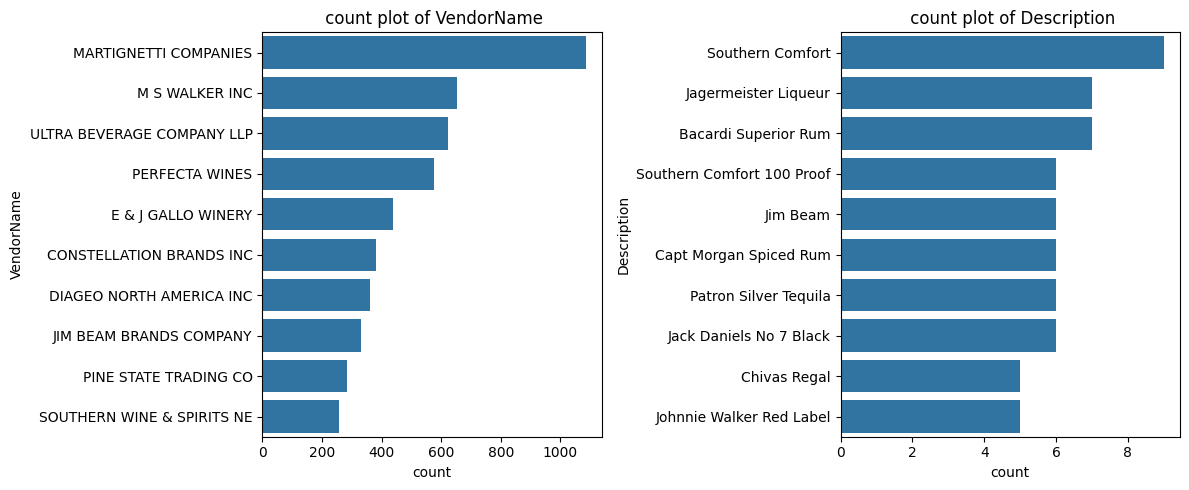

In [16]:
# now checking ki df me kis vendor ka sabse jayda data present hai and kis product ka data present hai 

# count plot for categeorical data 

categorical_cols = ["VendorName" ,"Description"] 

plt.figure(figsize=(12,5))
for i , col in enumerate(categorical_cols):
    plt.subplot(1, 2, i+1)
    sns.countplot(y=df[col] , order=df[col].value_counts().index[:10] ) # just top 10 vendors data 
    plt.title(f" count plot of {col}")
plt.tight_layout()
plt.show()

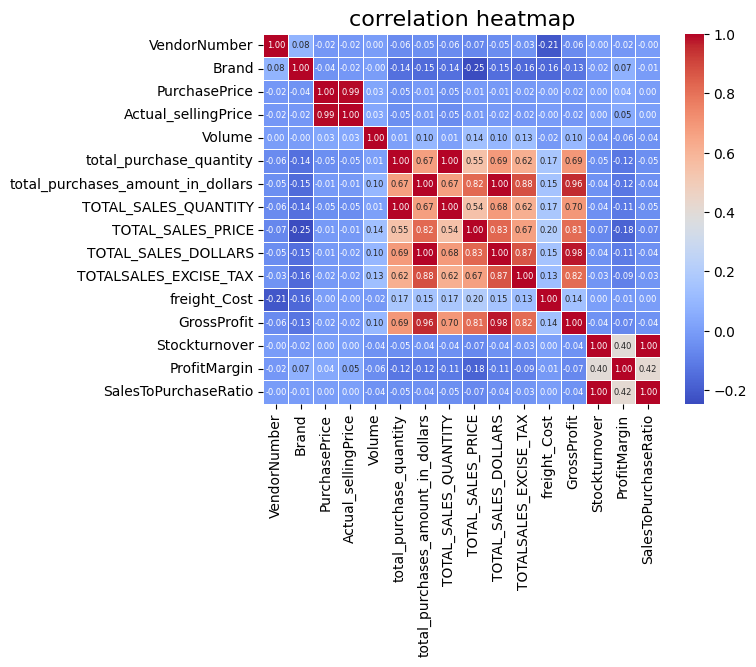

In [17]:
plt.Figure(figsize=(10,5))
correlation_matrix = df[numerical_cols].corr() 
sns.heatmap(correlation_matrix , annot=True ,fmt=".2f", cmap="coolwarm", linewidths= 0.7,square=False,annot_kws={"size": 6})
plt.title("correlation heatmap" , fontsize = 16)
# plt.tight_layout()
plt.show()

solving the research problem

identify brands that needs promotional or pricing adjustment which exhibit(shows) lower sales performance but higher profit margin.

In [18]:
# now on the basis of these correlation matrix we creating and analyzing the value with a threshold point. 
Brand_performance  =df.groupby('Description').agg({
    'TOTAL_SALES_DOLLARS' : 'sum',
    'ProfitMargin' : 'mean'
}).reset_index()

'''Brand_performance : this shows that the brand have number of profit percent and there sales in dollars '''
Brand_performance

,Description,TOTAL_SALES_DOLLARS,ProfitMargin
0,(RI) 1,21519.09,18.060661
1,.nparalleled Svgn Blanc,1094.63,29.978166
2,10 Span Cab Svgn CC,2703.89,20.937612
3,10 Span Chard CC,3325.56,27.806445
4,10 Span Pnt Gris Monterey Cy,2082.22,32.226182
...,...,...,...
7702,Zorvino Vyds Sangiovese,10579.03,29.525675
7703,Zuccardi Q Malbec,1639.18,23.981503
7704,Zum Rsl,10857.34,32.675038
7705,Zwack Liqueur,227.88,16.653502


In [19]:
'''and to solve the given problem statement we set a threshold value and below this needs the promotional part or not and above this is required or not '''
low_Sales_threshold = Brand_performance['TOTAL_SALES_DOLLARS'].quantile(0.15)
high_margin_threshold = Brand_performance['ProfitMargin'].quantile(0.85)

In [20]:
low_Sales_threshold

np.float64(560.299)

In [21]:
high_margin_threshold

np.float64(64.97017552750113)

In [22]:
'''now using this above data we target those brands have the sales in dollars less than 560 but have profit margin percentage more than 64''' 

# filtering sales with high profit but low sales 

Target_brands = Brand_performance[
    (Brand_performance['TOTAL_SALES_DOLLARS']<= low_Sales_threshold) &
    (Brand_performance['ProfitMargin']>= high_margin_threshold) 
]
print("brands with low sales but high profit :") 
display(Target_brands.sort_values('TOTAL_SALES_DOLLARS'))

brands with low sales but high profit :


,Description,TOTAL_SALES_DOLLARS,ProfitMargin
6199,Santa Rita Organic Svgn Bl,9.99,66.466466
2369,Debauchery Pnt Nr,11.58,65.975820
2070,Concannon Glen Ellen Wh Zin,15.95,83.448276
2188,Crown Royal Apple,27.86,89.806174
6237,Sauza Sprklg Wild Berry Marg,27.96,82.153076
...,...,...,...
5074,Nanbu Bijin Southern Beauty,535.68,76.747312
2271,Dad's Hat Rye Whiskey,538.89,81.851584
57,A Bichot Clos Marechaudes,539.94,67.740860
6245,Sbragia Home Ranch Merlot,549.75,66.444748


In [23]:
# now making a better visualization which shows that we have to target which brand 

Brand_performance = Brand_performance[Brand_performance['TOTAL_SALES_DOLLARS']<10000]#for better visualization

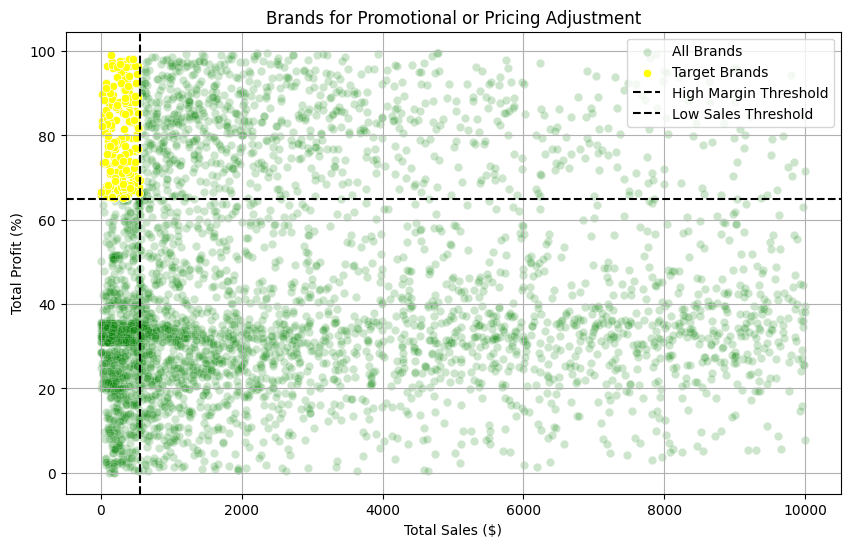

In [24]:
plt.figure(figsize=(10,6))  
sns.scatterplot(data=Brand_performance, x='TOTAL_SALES_DOLLARS', y='ProfitMargin', color='green', label='All Brands', alpha=0.2)
sns.scatterplot(data=Target_brands, x='TOTAL_SALES_DOLLARS', y='ProfitMargin', color='yellow', label='Target Brands')

plt.axhline(high_margin_threshold, linestyle='--', color='black', label='High Margin Threshold')
plt.axvline(low_Sales_threshold, linestyle='--', color='black', label='Low Sales Threshold')

plt.xlabel("Total Sales ($)")
plt.ylabel("Total Profit (%)")
plt.title('Brands for Promotional or Pricing Adjustment')
plt.legend()
plt.grid(True)
plt.show()

In [25]:
df.columns

Index(['VendorNumber', 'VendorName', 'Brand', 'PurchasePrice',
       'Actual_sellingPrice', 'Volume', 'Description',
       'total_purchase_quantity', 'total_purchases_amount_in_dollars',
       'TOTAL_SALES_QUANTITY', 'TOTAL_SALES_PRICE', 'TOTAL_SALES_DOLLARS',
       'TOTALSALES_EXCISE_TAX', 'freight_Cost', 'GrossProfit', 'Stockturnover',
       'ProfitMargin', 'SalesToPurchaseRatio'],
      dtype='object')

which vendors and brands demonstrate the higher sales performance


In [26]:
df.dtypes

VendorNumber                           int64
VendorName                            object
Brand                                  int64
PurchasePrice                        float64
Actual_sellingPrice                  float64
Volume                               float64
Description                           object
total_purchase_quantity                int64
total_purchases_amount_in_dollars    float64
TOTAL_SALES_QUANTITY                   int64
TOTAL_SALES_PRICE                    float64
TOTAL_SALES_DOLLARS                  float64
TOTALSALES_EXCISE_TAX                float64
freight_Cost                         float64
GrossProfit                          float64
Stockturnover                        float64
ProfitMargin                         float64
SalesToPurchaseRatio                 float64
dtype: object

In [27]:
# so we filter top brands and vendorrs 
top_vendors = df.groupby('VendorName')['TOTAL_SALES_DOLLARS'].sum().nlargest(10)
top_brands = df.groupby('Description')['TOTAL_SALES_DOLLARS'].sum().nlargest(10)


In [28]:
top_brands

Description
Jack Daniels No 7 Black    7964746.76
Tito's Handmade Vodka      7399657.58
Grey Goose Vodka           7209608.06
Capt Morgan Spiced Rum     6356320.62
Absolut 80 Proof           6244752.03
Jameson Irish Whiskey      5715759.69
Ketel One Vodka            5070083.56
Baileys Irish Cream        4150122.07
Kahlua                     3604858.66
Tanqueray                  3456697.90
Name: TOTAL_SALES_DOLLARS, dtype: float64

In [29]:
top_vendors

VendorName
DIAGEO NORTH AMERICA INC      67990099.42
MARTIGNETTI COMPANIES         39330359.36
PERNOD RICARD USA             32063196.19
JIM BEAM BRANDS COMPANY       31423020.46
BACARDI USA INC               24854817.14
CONSTELLATION BRANDS INC      24218745.65
E & J GALLO WINERY            18399899.46
BROWN-FORMAN CORP             18247230.65
ULTRA BEVERAGE COMPANY LLP    16502544.31
M S WALKER INC                14706458.51
Name: TOTAL_SALES_DOLLARS, dtype: float64

In [30]:
# creating a function for maintaining dollars to look in million or k's
def format_dollars(value):
    if value >= 1_000_000:
        return f"{value/1_000_000:.2f}M"
    elif value >=  1_000:
        return f"{value/1_000:.2f}k"
    else:
        return str(value)

In [31]:
top_brands.apply(lambda x: format_dollars(x))

Description
Jack Daniels No 7 Black    7.96M
Tito's Handmade Vodka      7.40M
Grey Goose Vodka           7.21M
Capt Morgan Spiced Rum     6.36M
Absolut 80 Proof           6.24M
Jameson Irish Whiskey      5.72M
Ketel One Vodka            5.07M
Baileys Irish Cream        4.15M
Kahlua                     3.60M
Tanqueray                  3.46M
Name: TOTAL_SALES_DOLLARS, dtype: object

In [32]:
top_vendors.dtypes

dtype('float64')

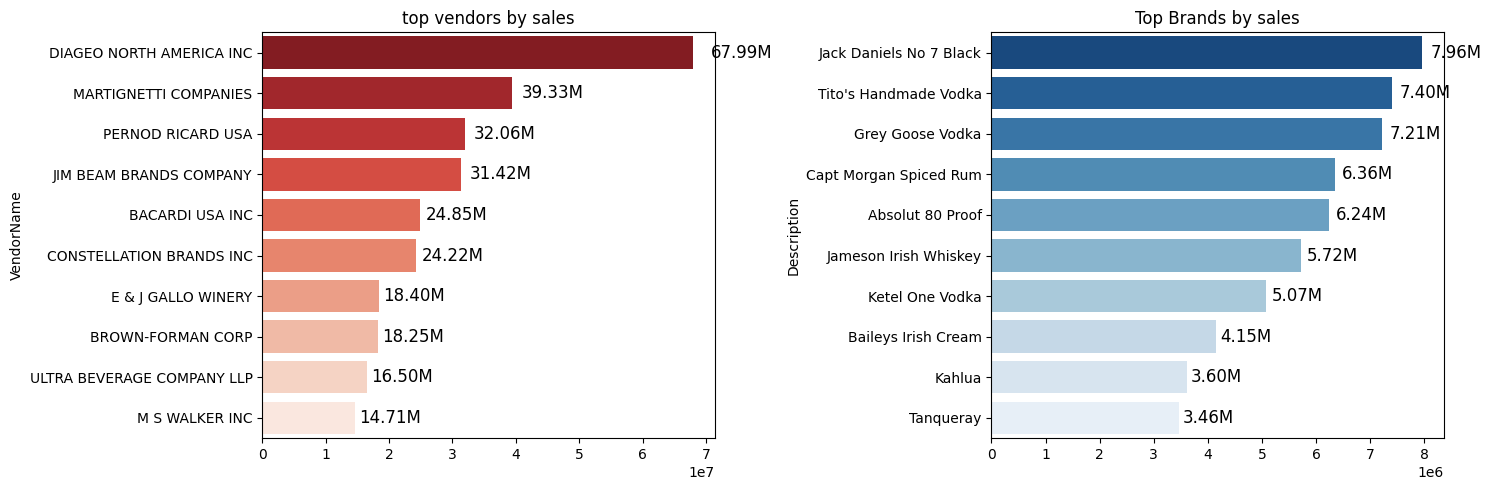

In [33]:
# now writing the script to plot all this using the bar graph and compare them 
plt.figure(figsize=(15,5))

# plot for top vendors 
plt.subplot(1, 2, 1)
ax1 = sns.barplot(y=top_vendors.index , x=top_vendors.values ,palette="Reds_r")
plt.title("top vendors by sales")

# this script se bar ke age jo bhi uski value hai bo text form me a jaye 
for bar in ax1.patches:
    ax1.text(bar.get_width() +(bar.get_width() * 0.04),
            bar.get_y() + bar.get_height()/2,
            format_dollars(bar.get_width()),
            ha= 'left' , va= 'center' , fontsize= 12 , color= 'black') 
    
# plot for vendors 
plt.subplot(1, 2, 2)
ax2 = sns.barplot(y=top_brands.index , x= top_brands.values , palette=  "Blues_r") 
plt.title("Top Brands by sales") 


for bar in ax2.patches:
    ax2.text(bar.get_width() +(bar.get_width() * 0.02),
            bar.get_y() + bar.get_height()/2,
            format_dollars(bar.get_width()),
            ha= 'left' ,fontsize= 12, va= 'center' , color= 'black') 

plt.tight_layout()
plt.show()


Third problem

-> which vendors contribute the most to total Purchase Dollars 

In [34]:
df.columns

Index(['VendorNumber', 'VendorName', 'Brand', 'PurchasePrice',
       'Actual_sellingPrice', 'Volume', 'Description',
       'total_purchase_quantity', 'total_purchases_amount_in_dollars',
       'TOTAL_SALES_QUANTITY', 'TOTAL_SALES_PRICE', 'TOTAL_SALES_DOLLARS',
       'TOTALSALES_EXCISE_TAX', 'freight_Cost', 'GrossProfit', 'Stockturnover',
       'ProfitMargin', 'SalesToPurchaseRatio'],
      dtype='object')

In [35]:
# step 1 check the vendor with most purchase dollars sales 
vendor_contribution =df.groupby('VendorName').agg(
    {
        'TOTAL_SALES_DOLLARS' :'sum',
        'GrossProfit':'sum',
        'total_purchases_amount_in_dollars' :'sum'
    }
).reset_index() 

vendor_contribution


,VendorName,TOTAL_SALES_DOLLARS,GrossProfit,total_purchases_amount_in_dollars
0,ADAMBA IMPORTS INTL INC,704.53,258.37,446.16
1,ALISA CARR BEVERAGES,104470.94,78772.82,25698.12
2,ALTAMAR BRANDS LLC,15706.81,4000.61,11706.20
3,AMERICAN SPIRITS EXCHANGE,1511.16,577.08,934.08
4,AMERICAN VINTAGE BEVERAGE,139603.53,35167.85,104435.68
...,...,...,...,...
114,WEIN BAUER INC,56217.13,13522.49,42694.64
115,WESTERN SPIRITS BEVERAGE CO,405254.83,106837.97,298416.86
116,WILLIAM GRANT & SONS INC,7569876.20,1693337.94,5876538.26
117,WINE GROUP INC,8304043.28,3100242.11,5203801.17


In [36]:
vendor_contribution['PurchaseContribution_%'] = (vendor_contribution['total_purchases_amount_in_dollars'] /vendor_contribution['total_purchases_amount_in_dollars'].sum() *100)

In [37]:
vendor_contribution=round(vendor_contribution.sort_values('PurchaseContribution_%',ascending=False), 2) 
vendor_contribution

,VendorName,TOTAL_SALES_DOLLARS,GrossProfit,total_purchases_amount_in_dollars,PurchaseContribution_%
25,DIAGEO NORTH AMERICA INC,67990099.42,17892873.26,50097226.16,16.30
57,MARTIGNETTI COMPANIES,39330359.36,13828263.53,25502095.83,8.30
68,PERNOD RICARD USA,32063196.19,8212032.02,23851164.17,7.76
46,JIM BEAM BRANDS COMPANY,31423020.46,7928716.14,23494304.32,7.64
6,BACARDI USA INC,24854817.14,7422796.88,17432020.26,5.67
...,...,...,...,...,...
33,FANTASY FINE WINES CORP,327.59,198.95,128.64,0.00
107,UNCORKED,176.94,58.20,118.74,0.00
85,SILVER MOUNTAIN CIDERS,342.51,265.33,77.18,0.00
16,CAPSTONE INTERNATIONAL,246.87,192.23,54.64,0.00


In [38]:
top_vendors = vendor_contribution.head(10)
top_vendors['TOTAL_SALES_DOLLARS'] = top_vendors['TOTAL_SALES_DOLLARS'].apply(format_dollars)
top_vendors['total_purchases_amount_in_dollars'] = top_vendors['total_purchases_amount_in_dollars'].apply(format_dollars)
top_vendors['GrossProfit'] = top_vendors['GrossProfit'].apply(format_dollars)

top_vendors

,VendorName,TOTAL_SALES_DOLLARS,GrossProfit,total_purchases_amount_in_dollars,PurchaseContribution_%
25,DIAGEO NORTH AMERICA INC,67.99M,17.89M,50.10M,16.30
57,MARTIGNETTI COMPANIES,39.33M,13.83M,25.50M,8.30
68,PERNOD RICARD USA,32.06M,8.21M,23.85M,7.76
46,JIM BEAM BRANDS COMPANY,31.42M,7.93M,23.49M,7.64
6,BACARDI USA INC,24.85M,7.42M,17.43M,5.67
20,CONSTELLATION BRANDS INC,24.22M,8.95M,15.27M,4.97
11,BROWN-FORMAN CORP,18.25M,5.01M,13.24M,4.31
30,E & J GALLO WINERY,18.40M,6.33M,12.07M,3.93
106,ULTRA BEVERAGE COMPANY LLP,16.50M,5.34M,11.17M,3.63
53,M S WALKER INC,14.71M,4.94M,9.76M,3.18


In [39]:
# using this data we can compare the total cotribution of all others 100+ vendor with these top 10 

top_vendors['PurchaseContribution_%'].sum()

np.float64(65.69000000000001)

In [40]:
# this shows that from total 100 percent me se 66 % to sirf top_vendors hi kar rahe hai 
# and also guves the information that the rest vendors are not regular buyers or not able to give us the profit 

# now we were plotting a bargraph using this data and making a column of cumulative sum -> (its like fibonacci series )

top_vendors['Cumulative_contribution%'] = top_vendors['PurchaseContribution_%'].cumsum() 
top_vendors

,VendorName,TOTAL_SALES_DOLLARS,GrossProfit,total_purchases_amount_in_dollars,PurchaseContribution_%,Cumulative_contribution%
25,DIAGEO NORTH AMERICA INC,67.99M,17.89M,50.10M,16.30,16.30
57,MARTIGNETTI COMPANIES,39.33M,13.83M,25.50M,8.30,24.60
68,PERNOD RICARD USA,32.06M,8.21M,23.85M,7.76,32.36
46,JIM BEAM BRANDS COMPANY,31.42M,7.93M,23.49M,7.64,40.00
6,BACARDI USA INC,24.85M,7.42M,17.43M,5.67,45.67
20,CONSTELLATION BRANDS INC,24.22M,8.95M,15.27M,4.97,50.64
11,BROWN-FORMAN CORP,18.25M,5.01M,13.24M,4.31,54.95
30,E & J GALLO WINERY,18.40M,6.33M,12.07M,3.93,58.88
106,ULTRA BEVERAGE COMPANY LLP,16.50M,5.34M,11.17M,3.63,62.51
53,M S WALKER INC,14.71M,4.94M,9.76M,3.18,65.69


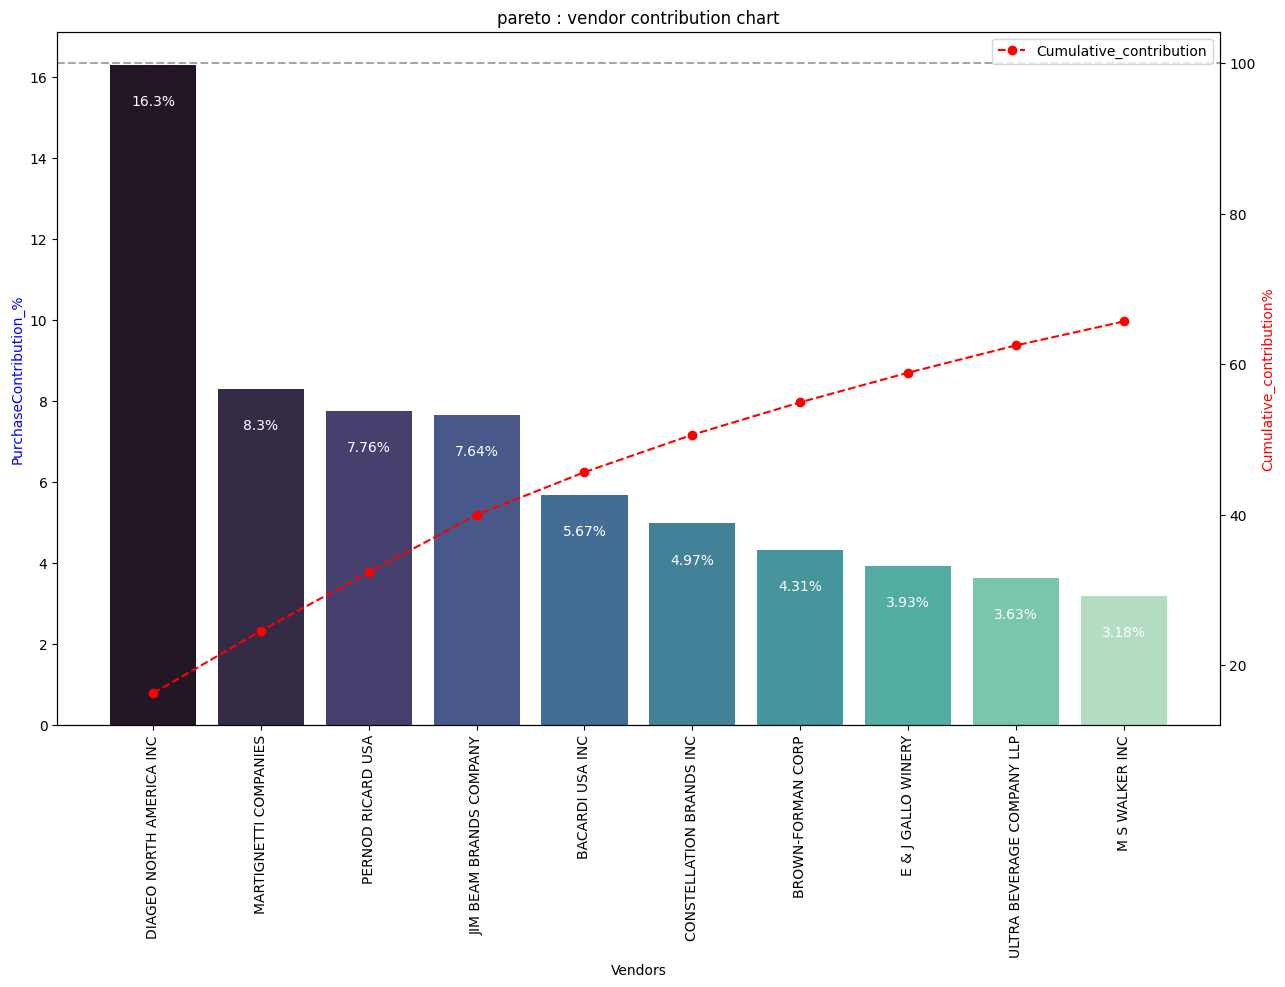

In [41]:
# now plotting a graph which gives the data of a comparison using bar and a line chart 
top_vendors['Cumulative_contribution%'] = top_vendors['PurchaseContribution_%'].cumsum() 

fig, ax1 = plt.subplots(figsize=(15,9)) 

# bar plot for Purchase_contribution 
sns.barplot(x=top_vendors['VendorName'],y=top_vendors['PurchaseContribution_%'],palette='mako',ax=ax1)

for i , value in enumerate(top_vendors['PurchaseContribution_%']):
    ax1.text(i,value-1,str(value)+'%',ha='center',fontsize=10,color='white')

# line chart for cumulative contribution 
ax2 = ax1.twinx()
ax2.plot(top_vendors['VendorName'],top_vendors['Cumulative_contribution%'],color='red',marker='o',label='Cumulative_contribution',linestyle='dashed')

ax1.set_xticklabels(top_vendors['VendorName'],rotation = 90)
ax1.set_ylabel('PurchaseContribution_%',color='blue')
ax2.set_ylabel('Cumulative_contribution%',color='red')
ax1.set_xlabel('Vendors')
ax1.set_title("pareto : vendor contribution chart")

ax2.axhline(y=100,color='grey',linestyle='dashed',alpha=0.7)
ax2.legend(loc = 'upper right')

plt.show() 

# find the difference between xlabel or y label 



how much of total procumerent/khareed is dependent on top vendors 

In [42]:
print(f"total contribution of top 10 vendors is {round(top_vendors['PurchaseContribution_%'].sum(), 2) }%")

total contribution of top 10 vendors is 65.69%


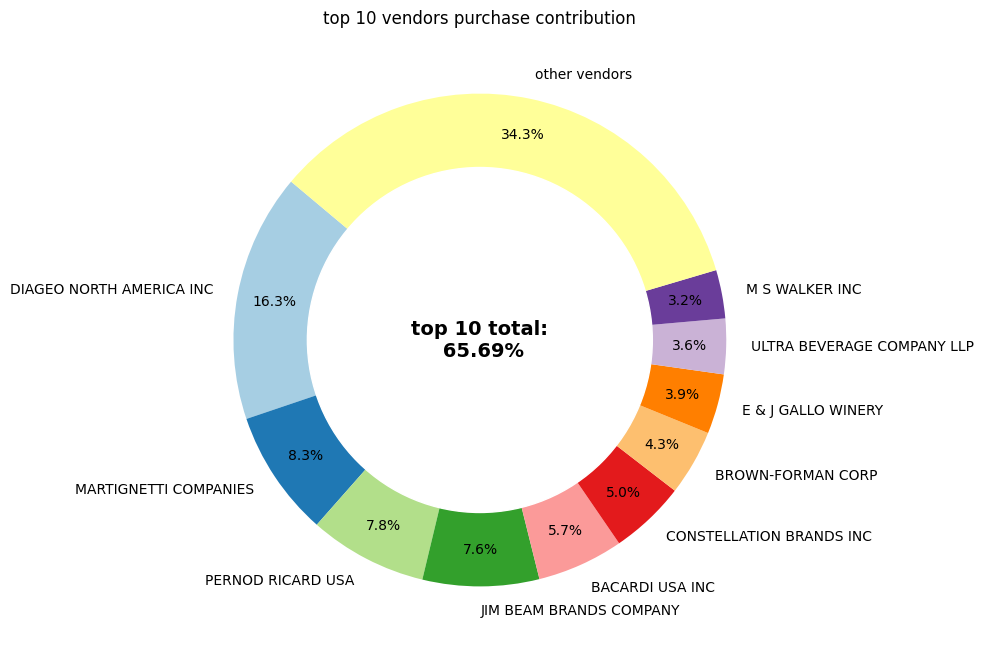

In [43]:
# so number of remaining contributor is 100-65.9=34.1
# and we represent this all in form of pie chart 

# step 1 getting vendors name 
vendors = list(top_vendors['VendorName'].values)

# step 2 getting the contribution 
purchase_contribution = list(top_vendors['PurchaseContribution_%'].values)
total_contribution = sum(purchase_contribution)
remaining_contribution = 100-total_contribution

# step 3 append others vendors categeory 
vendors.append("other vendors")
purchase_contribution.append(remaining_contribution)

# step 4 creating a donut chart 
fig, ax = plt.subplots(figsize=(8,8))
widges , text ,autotext = ax.pie(purchase_contribution,labels=vendors,autopct='%1.1f%%', startangle=140,pctdistance=0.85,colors=plt.cm.Paired.colors) 

# step 4 center space for donut shape 
center_circle = plt.Circle((0,0), 0.70, color='white')
fig.gca().add_artist(center_circle)

# ṣtep 5 add total contribution annotation in center 
plt.text(0,0, f"top 10 total:\n {total_contribution:.2f}%",fontsize=14,fontweight= 'bold',ha='center',va='center')
plt.title("top 10 vendors purchase contribution")
plt.show()

Does purchasing in bulk reduce the per unit price , and what is the optimal purchase volume for cost saving 

In [44]:
df['Unitprice'] = df['total_purchases_amount_in_dollars']/df['total_purchase_quantity']

In [45]:
df

,VendorNumber,VendorName,Brand,PurchasePrice,Actual_sellingPrice,Volume,Description,total_purchase_quantity,total_purchases_amount_in_dollars,TOTAL_SALES_QUANTITY,TOTAL_SALES_PRICE,TOTAL_SALES_DOLLARS,TOTALSALES_EXCISE_TAX,freight_Cost,GrossProfit,Stockturnover,ProfitMargin,SalesToPurchaseRatio,Unitprice
0,7245,PROXIMO SPIRITS INC.,3065,0.71,0.99,50.0,Three Olives Grape Vodka,1,0.71,86,33.66,85.14,4.46,38994.78,84.43,86.000000,99.166079,119.915493,0.71
1,3960,DIAGEO NORTH AMERICA INC,6127,1.47,1.99,200.0,The Club Strawbry Margarita,1,1.47,72,77.61,143.28,15.12,257032.07,141.81,72.000000,98.974037,97.469388,1.47
2,3924,HEAVEN HILL DISTILLERIES,9123,0.74,0.99,50.0,Deep Eddy Vodka,2,1.48,2,0.99,1.98,0.10,14069.87,0.50,1.000000,25.252525,1.337838,0.74
3,8004,SAZERAC CO INC,5683,0.39,0.49,50.0,Dr McGillicuddy's Apple Pie,6,2.34,134,1.47,65.66,7.04,50293.62,63.32,22.333333,96.436186,28.059829,0.39
4,9815,WINE GROUP INC,8527,1.32,4.99,750.0,Concannon Glen Ellen Wh Zin,2,2.64,5,10.96,15.95,0.55,27100.41,13.31,2.500000,83.448276,6.041667,1.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8559,3960,DIAGEO NORTH AMERICA INC,3545,21.89,29.99,1750.0,Ketel One Vodka,138109,3023206.01,135838,545778.28,4223107.62,249587.83,257032.07,1199901.61,0.983556,28.412764,1.396897,21.89
8560,3960,DIAGEO NORTH AMERICA INC,4261,16.17,22.99,1750.0,Capt Morgan Spiced Rum,201682,3261197.94,200412,420050.01,4475972.88,368242.80,257032.07,1214774.94,0.993703,27.139908,1.372493,16.17
8561,17035,PERNOD RICARD USA,8068,18.24,24.99,1750.0,Absolut 80 Proof,187407,3418303.68,187140,461140.15,4538120.60,343854.07,123780.22,1119816.92,0.998575,24.675786,1.327594,18.24
8562,4425,MARTIGNETTI COMPANIES,3405,23.19,28.99,1750.0,Tito's Handmade Vodka,164038,3804041.22,160247,561512.37,4819073.49,294438.66,144929.24,1015032.27,0.976890,21.062810,1.266830,23.19


In [46]:
# using quantile method we divide the unitprice and buying in three different quarter 
df['Ordersize']= pd.qcut(df['total_purchase_quantity'],q=3 ,labels= ["Small","Medium","Large"])

In [47]:
df[['Ordersize', 'total_purchase_quantity']]

,Ordersize,total_purchase_quantity
0,Small,1
1,Small,1
2,Small,2
3,Small,6
4,Small,2
...,...,...
8559,Large,138109
8560,Large,201682
8561,Large,187407
8562,Large,164038


In [48]:
# so on the basis of these quantile we find mean of each to find in which quantile we pat more and which we pay less , and which one cost most 
df.groupby('Ordersize')[['Unitprice']].mean()

,Unitprice
Ordersize,
Small,39.068186
Medium,15.486414
Large,10.777625


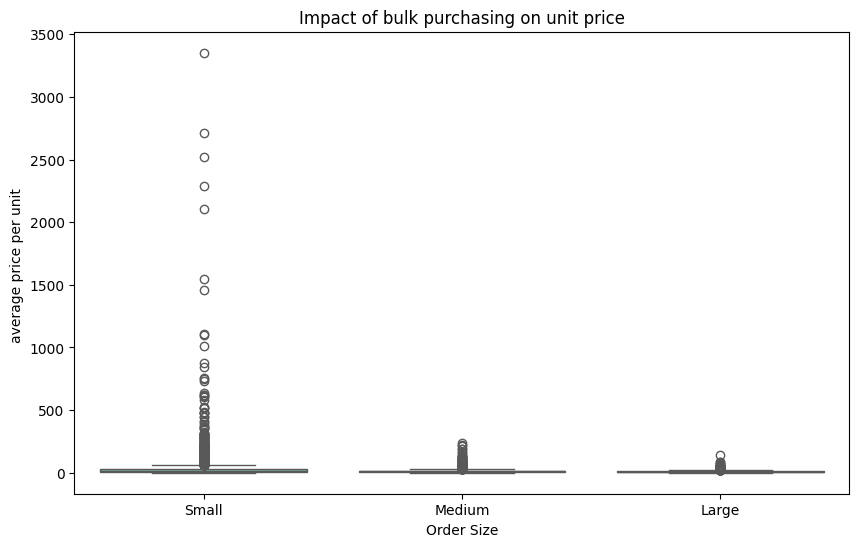

In [49]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df , x='Ordersize',y='Unitprice',palette='Set2')
plt.title("Impact of bulk purchasing on unit price")
plt.xlabel('Order Size')
plt.ylabel("average price per unit ")
plt.show()

Which vendor have low inventory turnover , indicating excess stock and slow moving products?

In [50]:
df[df['Stockturnover']<1].groupby('VendorName')[['Stockturnover']].mean().sort_values('Stockturnover',ascending=True).head(10)

,Stockturnover
VendorName,
ALISA CARR BEVERAGES,0.615385
HIGHLAND WINE MERCHANTS LLC,0.708333
PARK STREET IMPORTS LLC,0.751306
Circa Wines,0.755676
Dunn Wine Brokers,0.766022
CENTEUR IMPORTS LLC,0.773953
SMOKY QUARTZ DISTILLERY LLC,0.783835
TAMWORTH DISTILLING,0.797078
THE IMPORTED GRAPE LLC,0.807569


How much capital is locked in unsold inventory per vendor , and which vendor contribute the most to it ?

In [51]:
df['Unsold_inventory_value'] = (df['total_purchase_quantity'] - df['TOTAL_SALES_QUANTITY'] )*df['PurchasePrice']
print("total Unsold Inventory:", format_dollars(df['Unsold_inventory_value'].sum()))

total Unsold Inventory: 2.71M


In [52]:
# aggregate capital locked per vendor 
inventory_value_per_vendor = df.groupby('VendorName')['Unsold_inventory_value'].sum().reset_index() 

# sorting vendor with highest inventory locked storage \
inventory_value_per_vendor = inventory_value_per_vendor.sort_values('Unsold_inventory_value',ascending=False)
inventory_value_per_vendor['Unsold_inventory_value'] = inventory_value_per_vendor['Unsold_inventory_value'].apply(format_dollars)
inventory_value_per_vendor.head(10)

,VendorName,Unsold_inventory_value
25,DIAGEO NORTH AMERICA INC,722.21k
46,JIM BEAM BRANDS COMPANY,554.67k
68,PERNOD RICARD USA,470.63k
116,WILLIAM GRANT & SONS INC,401.96k
30,E & J GALLO WINERY,228.28k
79,SAZERAC CO INC,198.44k
11,BROWN-FORMAN CORP,177.73k
20,CONSTELLATION BRANDS INC,133.62k
61,MOET HENNESSY USA INC,126.48k
77,REMY COINTREAU USA INC,118.60k


What is the 95% confidence intervals for profit margins of top performing and low performing vendor 

In [53]:
top_threshold = df['TOTAL_SALES_DOLLARS'].quantile(0.75)
low_threshold = df['TOTAL_SALES_DOLLARS'].quantile(0.25)

In [54]:
top_vendor = df[df['TOTAL_SALES_DOLLARS']>= top_threshold]['ProfitMargin'].dropna()
low_vendors = df[df['TOTAL_SALES_DOLLARS']<=low_threshold]['ProfitMargin'].dropna()

In [55]:
# top vendors 
top_vendor

3513    94.271857
3643    95.012530
3812    93.085860
4882    85.782102
5040    79.684817
          ...    
8559    28.412764
8560    27.139908
8561    24.675786
8562    21.062810
8563    25.297693
Name: ProfitMargin, Length: 2141, dtype: float64

In [56]:
# low vendor 
low_vendors

0       99.166079
1       98.974037
2       25.252525
3       96.436186
4       83.448276
          ...    
2839     7.239599
2859     1.677308
2862    12.007271
2911     6.145626
2932     4.111764
Name: ProfitMargin, Length: 2141, dtype: float64

In [57]:
# creating a function to calculate the confidence interval 
def confidence_interval(data, confidence = 0.95):
    mean_val = np.mean(data)
    stddev_error = np.std(data , ddof =1)/ np.sqrt(len(data)) # standard error 
    t_critical = stats.t.ppf((1+confidence)/2 , df=len(data)-1)
    margin_of_error = t_critical*stddev_error
    return mean_val, mean_val-margin_of_error, mean_val+margin_of_error

top vendors CI: 30.74,31.61,Mean: 31.18
low Vendor CI: 40.50,42.64,Mean: 41.57


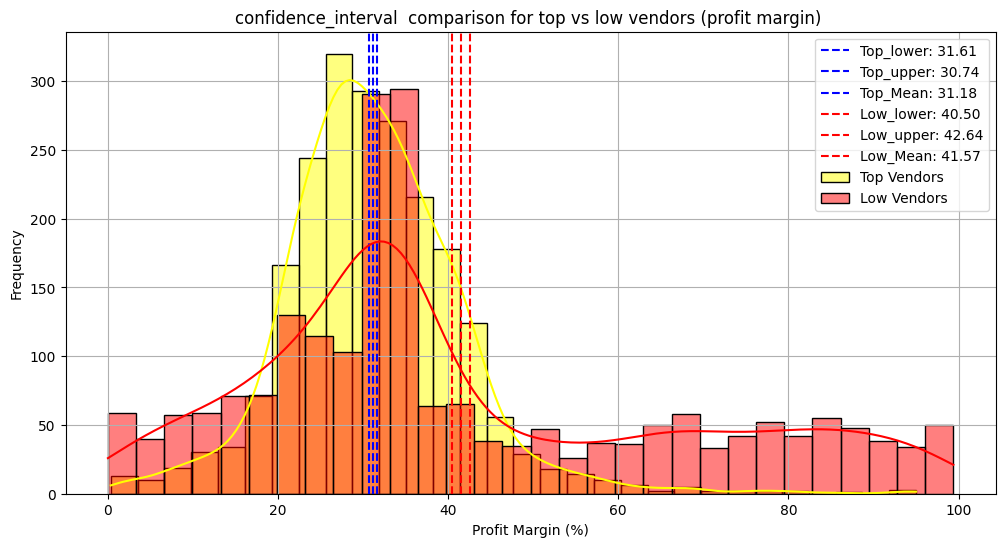

In [58]:
# plotting histogram to see above data 
top_mean , top_upper , top_lower = confidence_interval(top_vendor)
low_mean , low_lower , low_upper = confidence_interval(low_vendors)

print(f"top vendors CI: {top_upper :.2f},{top_lower:.2f},Mean: {top_mean:.2f}")
print(f"low Vendor CI: {low_lower:.2f},{low_upper:.2f},Mean: {low_mean:.2f}")

# plotting figure 

plt.figure(figsize=(12,6))

# plt for top vendors
sns.histplot(top_vendor,kde= True , color='Yellow',bins=30,alpha= 0.5,label= "Top Vendors")
plt.axvline(top_lower,color='blue', linestyle = '--',label = f"Top_lower: {top_lower:.2f}")
plt.axvline(top_upper,color='blue', linestyle = '--',label = f"Top_upper: {top_upper:.2f}")
plt.axvline(top_mean,color='blue', linestyle = '--',label = f"Top_Mean: {top_mean:.2f}")

# plt for low ci vendors 
sns.histplot(low_vendors,kde=True,color='Red',bins=30,label="Low Vendors")
plt.axvline(low_lower,color= 'Red', linestyle = '--',label= f"Low_lower: {low_lower:.2f}")
plt.axvline(low_upper,color= 'Red', linestyle = '--',label= f"Low_upper: {low_upper:.2f}")
plt.axvline(low_mean,color= 'Red', linestyle = '--',label= f"Low_Mean: {low_mean:.2f}") 

# finalize Plot 

plt.title("confidence_interval  comparison for top vs low vendors (profit margin) ") 
plt.xlabel('Profit Margin (%)')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

Is there is a significant Difference between the top performing vendors and low performing vendors 

hypothesis :
h0 (null hypothesis) = there is no significant difference between profit margin of top performing and low performing vendor  

h1 (alternative hypothesis) = the mean profit margin of top performing and low performing vendors are significantly different 


In [59]:
top_threshold = df['TOTAL_SALES_DOLLARS'].quantile(0.75)
low_threshold = df['TOTAL_SALES_DOLLARS'].quantile(0.25) 

top_vendor = df[df['TOTAL_SALES_DOLLARS']>= top_threshold]['ProfitMargin'].dropna()
low_vendors = df[df['TOTAL_SALES_DOLLARS']<=low_threshold]['ProfitMargin'].dropna() 

# hypothesis testing 
t_stat , p_value = ttest_ind(top_vendor,low_vendors,equal_var=False)

# print result 

print(f'T-statistics : {t_stat:.4f}, P-value: {p_value:.4f}')
if p_value < 0.5 :
    print("Reject h0 : there is no significant difference between profit margin of top performing and low performing vendor  ")
else:
    print(" Fail to reject H0: no significant difference between profit margin ")

T-statistics : -17.6695, P-value: 0.0000
Reject h0 : there is no significant difference between profit margin of top performing and low performing vendor  


project completed 

In [61]:
df.to_csv("vendor_sales_summary1.csv" , index=False)

In [62]:
df = pd.read_csv("vendor_sales_summary1.csv")

In [63]:
print("number of records ",len(df))

number of records  8564


In [65]:
print(f"the dataset has {df.shape[0]}rows and {df.shape[1]} columns")

the dataset has 8564rows and 21 columns
